# Segmentación de Figuras

- Color
    <img src='https://github.com/AlbDav27/Proyect1ARA_ML/blob/main/Colors.png?raw=1' />
- Forma  
    <img src='https://github.com/AlbDav27/Proyect1ARA_ML/blob/main/form.png?raw=1' />

## Importar  librerias 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image,ImageOps
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters

### Lectura de archivo de imágenes 

In [12]:
Blue=os.path.join("Proyect1ARA_ML/images/Azul.png")
Black=os.path.join("Proyect1ARA_ML/images/Negro.png")
Red=os.path.join("Proyect1ARA_ML/images/Rojo.png")

In [13]:
Bl = Image.open(Blue)
Bk = Image.open(Black)
Rd = Image.open(Red)

## Analizamos los datos 

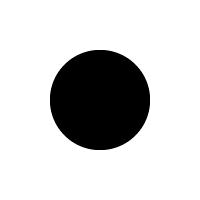

In [14]:
Bk

In [15]:
# Transformando a un arreglo 
np.array(Bk).shape

(200, 200, 4)

In [17]:
# Verificando los canales 
Bk.getbands()

('R', 'G', 'B', 'A')

In [18]:
# Removiendo el canal alpha 
ABk=np.array(Bk)[:,:,0:3]
ABl=np.array(Bl)[:,:,0:3]
ARd=np.array(Rd)[:,:,0:3]

In [19]:
# Verificando la forma
ABk.shape

(200, 200, 3)

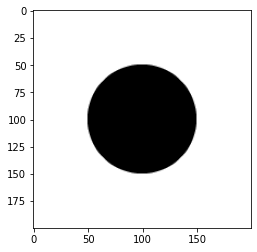

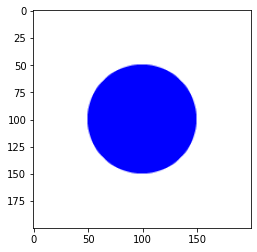

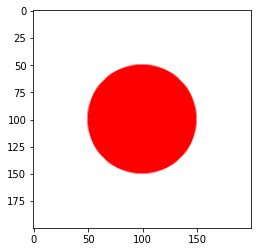

In [20]:
# Graficando las imágenes 
plt.imshow(ABk)
plt.show()
plt.imshow(ABl)
plt.show()
plt.imshow(ARd)
plt.show()

# Detectando el color por valor del pixel 
Extrayendo las características 

In [21]:
print(ABk[100,100])
print(ABl[100,100])
print(ARd[100,100])

[0 0 0]
[  0   0 255]
[255   0   0]


 **nota**: si los valores son tan distintivos no es necesario aplicar una red neuronal 

# Clasificador de color

In [22]:
#importar sklearn
from sklearn.neural_network import MLPClassifier

## Preparando los datos 

Para este primer caso usaremos aprendizaje supervisado 
Los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- negro=1,0,0
- rojo=0,1,0
- azul=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]



In [64]:
def Lector_de_imagenes(Train_dir,jsonfile):
    Train_data=[]
    train_names=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath)
            Train_data.append(np.array(img)[:,:,0:3][100,100]) 
            path, name=os.path.split(imgpath)
            train_names.append(name)
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags, train_names

In [68]:
X_train,y_train, tnames=Lector_de_imagenes("Proyect1ARA_ML/images/colores/Train","Proyect1ARA_ML/Train_color.json")

Tag error: desktop.ini
file error: desktop.ini


In [93]:
X_test,y_test, testnames=Lector_de_imagenes("Proyect1ARA_ML/images/colores/Test","Proyect1ARA_ML/Test_color.json")

Tag error: desktop.ini
file error: desktop.ini


In [124]:
X_train

array([[  0,  51, 255],
       [255,   0,   0],
       [ 15,  18,  14],
       [255,   0,  51],
       [255,  43,  43],
       [ 30,  30,  30],
       [153,   0,   0],
       [  0,   0,   0],
       [136,   0,   0],
       [  0,   0, 102],
       [  0,  51, 153],
       [ 44,  44,  44],
       [  0,  51, 204],
       [221,   0,   0],
       [  0,   0, 153],
       [  0, 153, 255],
       [ 51,  51,  51],
       [ 17,  17,  17]], dtype=uint8)

## Ajustar Parámetros del modelo

In [125]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(10, 2), random_state=1)

## Ajuste del modelo

In [126]:
clfcolor.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [127]:
pred = clfcolor.predict(X_test)
pred

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 1, 1]])

## Evaluar al modelo 

In [128]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [129]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [131]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_test)

In [132]:
print(accuracy_score(predclass,yclass)) 

0.3333333333333333


In [133]:
print(confusion_matrix(predclass,yclass))


[[3 2 3]
 [0 0 0]
 [0 1 0]]


## Clasificador de forma 
### Lectura de archivo de imágenes 

In [134]:
CR=os.path.join("Proyect1ARA_ML/images/circulo.png")
CD=os.path.join("Proyect1ARA_ML/images/cuadro.png")
TR=os.path.join("Proyect1ARA_ML/images/triangulo.png")

In [136]:
Cir = Image.open(CR).convert('L')
Cud = Image.open(CD).convert('L')
Tri = Image.open(TR).convert('L')

In [137]:
# Convertir a arreglo
ACR=np.array(Cir)
ACD=np.array(Cud)
ATR=np.array(Tri)

In [138]:
ACD.shape

(200, 200)

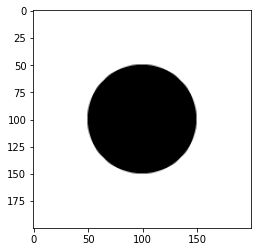

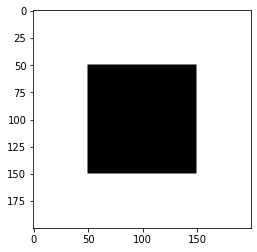

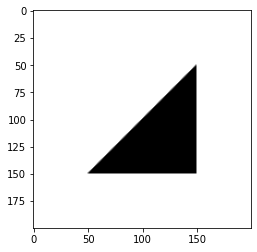

In [139]:
# Graficando las imágenes 
plt.imshow(ACR,cmap='gray')
plt.show()
plt.imshow(ACD,cmap='gray')
plt.show()
plt.imshow(ATR,cmap='gray')
plt.show()

## Determinando las características adecuadas 
¿Comó podemos  describir numéricamente la forma de las figuras?

### Usando el área de la figura como descriptor  

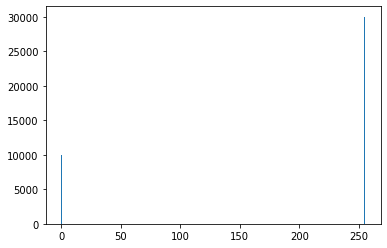

Área del cuadro en pixeles
10000


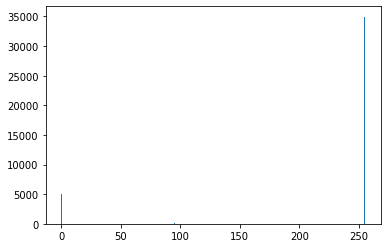

Área del Triángulo en pixeles
4950


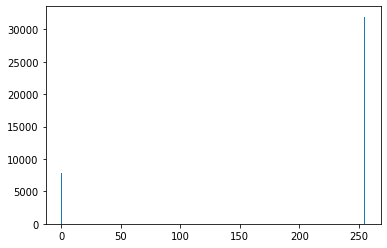

Área del círculo en pixeles
7772


In [140]:
# Posibles valores de intensidad en una imagen
x=np.arange(0,256)
# Cálculo del área del cuadrado 
hist,centers=ski.exposure.histogram(ACD)
plt.bar(x, hist)
plt.show()
print("Área del cuadro en pixeles")
# Cálculo del área del triángulo 
print(hist[0])
hist,centers=ski.exposure.histogram(ATR)
plt.bar(x, hist)
plt.show()
print("Área del Triángulo en pixeles")
# Cálculo del área del círculo 
print(hist[0])
hist,centers=ski.exposure.histogram(ACR)
plt.bar(x, hist)
plt.show()
print("Área del círculo en pixeles")
print(hist[0])

Ventajas  de usar el área como descriptor 
- Es invariante a la posición de la figura 

Limitantes de usar el área como descriptor 
- Es susceptible a los cambios en el tamaño  
- Es posible que el área de dos tipos de figuras diferentes se intersecten 

## Usando el número de  esquinas como descriptor 

In [141]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks

In [142]:
NCD=len(corner_peaks(corner_harris(ACD), min_distance=5))
NCR=len(corner_peaks(corner_harris(ACR), min_distance=5))
NTR=len(corner_peaks(corner_harris(ATR), min_distance=5))
print("Número de esquinas del cuadrado {}".format(NCD))
print("Número de esquinas del círculo {}".format(NCR))
print("Número de esquinas del triángulo  {}".format(NTR))

Número de esquinas del cuadrado 4
Número de esquinas del círculo 0
Número de esquinas del triángulo  3


Ventajas  de usar el área como descriptor 
- Es invariante a la posición de la figura 
- Es invariante a cambios en el tamaño

Limitantes de usar el área como descriptor 
- No permite diferenciar entre figuras con el mismo número de esquinas  cómo cuadrados y rectángulos
- El metodo de extraccion de caracteristicas falla en casos en donde las figuras tienen bordes irregulares como las figuras trazadas  a mano 

<img src='https://github.com/AlbDav27/Proyect1ARA_ML/blob/main/cuadroMT.png?raw=1' width="40%" height="40%" />

In [146]:
#Contra Ejemplo
CDD=os.path.join("Proyect1ARA_ML/cuadroMT.png")
CadD = Image.open(CDD).convert('L')
ACDD=np.array(CadD)
len(corner_peaks(corner_harris(ACDD), min_distance=5))

12

### Usando un descriptor invariante 

El problema de identificación de formas se ha estudiado durante mucho tiempo, como resultado se han propuesto metodologías de extracción de características invariantes a rotación, traslación y escalamiento. Estas características son los momentos invariables de Hu.

Para mayor detalle favor de consultar el capítulo de extracción de características del libro Gonzalez & Woods, Digital Image Processing

http://www.sc.ehu.es/ccwgrrom/transparencias/pdf-vision-1-transparencias/capitulo-8.pdf

255


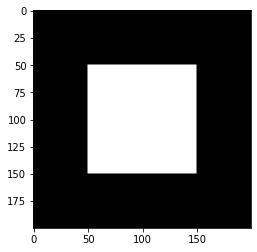

In [148]:
#  Proceso para aplicar los momentos de hu
# Invertir los colores de la imagen 
ICD=ski.util.invert(ACD)
print(ICD[100,100])
plt.imshow(ICD,cmap='gray')
plt.show()

In [149]:
def umbral_image(img):
    x,y=img.shape
    z=np.zeros((x,y))
    for i in range(x):
        for j in range(y):
            if img[i,j]>25:
                z[i,j]=250
    return z

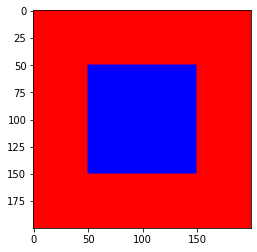

In [150]:
# Binarizar imagen 
CD=umbral_image(ICD)
label_image=ski.measure.label(ICD)
plt.imshow(ski.color.label2rgb(label_image))
plt.show()


In [151]:
# Calcular las propiedades de la figura
regions = ski.measure.regionprops(label_image)
for prop in regions[0]:
    print(prop, regions[0][prop])

area 10000
bbox (50, 50, 150, 150)
bbox_area 10000
centroid (99.5, 99.5)
convex_area 10000
convex_image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
coords [[ 50  50]
 [ 50  51]
 [ 50  52]
 ...
 [149 147]
 [149 148]
 [149 149]]
eccentricity 0.0
equivalent_diameter 112.83791670955127
euler_number 1
extent 1.0
filled_area 10000
filled_image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
image [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True 

In [152]:
# Obtener la propiedad de interés
momento =regions[0].moments_hu

In [153]:
# Creando una función para extraer los momentos de hu 
def hu_Characteristics(img):
    Iing=ski.util.invert(img)
    Uing=umbral_image(Iing)
    label_image=ski.measure.label(Uing)
    regions = ski.measure.regionprops(label_image)
    momento =regions[0].moments_hu
    return momento

In [154]:
print("Momentos del cuadrado {}".format(hu_Characteristics(ACD)))
print("Momentos del círculo {}".format(hu_Characteristics(ACR)))
print("Momentos del triángulo   {}".format(hu_Characteristics(ATR)))

Momentos del cuadrado [0.16665 0.      0.      0.      0.      0.      0.     ]
Momentos del círculo [0.15915634 0.         0.         0.         0.         0.
 0.        ]
Momentos del triángulo   [ 2.22178218e-01  1.23407901e-02  5.48493137e-03  2.19397255e-04
 -2.40675777e-07 -2.43726455e-05  0.00000000e+00]


## Preparando los datos

Para este primer caso usaremos aprendizaje supervisado,los datos de entrenamiento consisten en pares ordenados donde hay una lista de entradas y una lista de salidas 

### entradas
x=[[0,0,0],[1,0,0],[0,0,1]]

### Salidas 

(Necesario codificarlas) 
- Cuadro=1,0,0
- Triángulo=0,1,0
- Círculo=0,0,1

y=[[1,0,0],[0,1,0],[0,0,1]]

In [155]:
def Lector_forma(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try : 
            imgtag=etiquetas[img]
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath).convert('L')
            Train_data.append(hu_Characteristics(np.array(img))) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags 

In [156]:
X_train,y_train=Lector_forma("Proyect1ARA_ML/images/Forma/Train","Proyect1ARA_ML/Train_forma.json")

Tag error: desktop.ini
file error: desktop.ini


In [157]:
X_test,y_test=Lector_forma("Proyect1ARA_ML/images/Forma/Test","Proyect1ARA_ML/Test_forma.json")

Tag error: desktop.ini
file error: desktop.ini


In [158]:
X_train

array([[ 2.02886444e-01,  4.33109840e-03,  4.77973530e-03,
         1.47320455e-04,  1.19870140e-07,  9.04763748e-06,
        -3.02258185e-08],
       [ 1.59901163e-01,  2.20295717e-04,  4.92750219e-07,
         1.44698529e-09,  1.99642227e-17,  8.86164086e-12,
        -3.30800562e-17],
       [ 2.40502176e-01,  2.13045937e-02,  5.66413415e-03,
         3.02272974e-04, -3.81185816e-07, -4.27862096e-05,
        -1.05505906e-07],
       [ 1.59365801e-01,  4.76775209e-05,  1.36881255e-06,
         7.57078859e-10, -7.09176749e-18, -2.02090145e-12,
        -2.33169616e-17],
       [ 2.59405326e-01,  3.09133916e-02,  6.13880006e-03,
         3.98169636e-04, -5.95128918e-07, -6.77211927e-05,
         1.82581552e-07],
       [ 2.35452087e-01,  1.86965763e-02,  5.78921379e-03,
         4.93699889e-04,  4.27088289e-07,  1.67515892e-05,
         7.17102522e-07],
       [ 1.66992852e-01,  1.15236999e-04,  1.27895756e-06,
         1.36204460e-07, -1.17570826e-14, -9.08052061e-10,
        -5.5618919

## Ajustar Parámetros del modelo

In [159]:
clforma = MLPClassifier(solver='lbfgs', alpha=1e-2,
                  hidden_layer_sizes=(10, 3), random_state=1)

## Ajuste del modelo

In [160]:
clforma.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [161]:
pred = clforma.predict(X_test)

## Evaluar al modelo 

In [162]:
predclass=ClassDetector(pred)
yclass=ClassDetector(y_test)
print(predclass)
print(yclass)

[0, 0, 1, 0, 1, 0]
[0, 2, 1, 2, 1, 0]


In [163]:
print(accuracy_score(predclass,yclass)) 

0.6666666666666666


In [164]:
print(confusion_matrix(predclass,yclass))

[[2 0 2]
 [0 2 0]
 [0 0 0]]


In [ ]:
# Implementar el modelo

In [ ]:
from sklearn.externals import joblib

In [ ]:
filename = 'clforma_model.sav'
joblib.dump(clforma, filename)

['clforma_model.sav']

In [ ]:
loaded_model = joblib.load(filename)


In [ ]:
load_predict=loaded_model.predict(X_test)

In [ ]:
ClassDetector(load_predict)

[0, 0, 1, 1, 0, 0]